# Investigating Customer Shopping Trends: Who, What, Wear, and Why?

#### In this project, we will look at a customer shopping dataset and examine some pivotal questions related to business acumen:
- Can we accurately predict a customer's age based on their personal characteristics and shopping habits?
- Are we able to predict male gender based on their shopping habits?

#### This dataset was created by Sourav Banerjee and listed on kaggle. The actual kaggle dataset can be accessed here: 
https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset .

#### The CSV lists the following variables:
- Customer ID
- Age
- Gender
- Item Purchased
- Category
- Purchase Amount (USD)
- Location
- Size
- Color
- Season
- Review Rating
- Subscription Status
- Payment Method
- Shipping Type
- Discount Applied
- Promo Code Used
- Previous Purchases
- Preferred Payment Method
- Frequency of Purchases

### Install and import the necessary packages!

In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [6]:
import pandas as pd

### Great, now we will examine the head (the first five rows) of the dataset!

In [8]:
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### Cool! Now let's take a look at the shape of the data, this will be listed as (rows, columns).

In [10]:
df.shape

(3900, 19)

### Wow, 3900 rows! Let's see how this data's bins are broken down in each section...
This will give us a good idea of how many of each value we have. The value on the left is a table value, while the value on the right is the count of occurrences of that value.

In [12]:
for col in df.columns:
    print(f"{col}:\n {df[col].value_counts()}\n")

Customer ID:
 Customer ID
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: count, Length: 3900, dtype: int64

Age:
 Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

Gender:
 Gender
Male      2652
Female    1248
Name: count, dtype: int64

Item Purchased:
 Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks 

### We want to experiment with the relevance of all columns in the dataset, so we'll try and use them all in this first question!

### Now we try to model the first question...
- Can we predict what age a customer is based on their personal characteristics and shopping habits?

I want to see the possibilities of the whole dataset being used in a single question. This can help us see how the dataset's columns interact with each other and how to move forward with other questions. From a business' point-of-view, this can help to examine the importance of certain features in relation to other features.

#### We will use a decision tree to see if we could accurately what someone's age is based on various features.
We want to see how well all these different variables can predict the age of a customer. This can be useful information in tailoring marketing campaigns or even in the creation of new and improved products!

### We will first fix our categorical values to become boolean values! This will allow predictions to actually be made based on some binary value.

In [16]:
df = pd.get_dummies(df, columns = ['Gender', 'Item Purchased', 'Category', 'Location','Size','Color','Season','Subscription Status','Payment Method','Shipping Type','Discount Applied','Promo Code Used', 'Preferred Payment Method','Frequency of Purchases'], drop_first=True)

In [17]:
df.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,53,3.1,14,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
1,2,19,64,3.1,2,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,50,73,3.1,23,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,4,21,90,3.5,49,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,5,45,49,2.7,31,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


### Great! We've created boolean values using Pandas and OneHot encoding!
Again, we want to try and predict the ages of our customers based on personal characteristics and shopping habits! So, we will separate our data into a dependent set (X-set) and an independent set (y-set). 

In [19]:
X = df.drop(columns = ['Age'])
y = df['Age']

### Let's import a function to split our sets into training and testing sets!
We will use scikit-learn's _train_test_split_ function to do this! Then, we will split our data and take a look at the split!

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )

In [23]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (3120, 135)
X_test (780, 135)
y_train (3120,)
y_test (780,)


### Now we will train the model!

In [25]:
from sklearn import tree

In [26]:
age_clf = tree.DecisionTreeClassifier()
age_clf = age_clf.fit(X_train, y_train)

In [27]:
predicted = age_clf.predict(X_test)
predicted

array([26, 33, 27, 46, 19, 63, 25, 22, 24, 65, 39, 54, 57, 62, 52, 67, 53,
       49, 49, 39, 33, 36, 56, 33, 22, 29, 41, 59, 69, 63, 49, 57, 32, 54,
       54, 36, 28, 45, 51, 30, 57, 53, 65, 60, 66, 19, 43, 57, 46, 62, 24,
       35, 57, 37, 57, 59, 66, 68, 54, 34, 29, 50, 36, 66, 28, 66, 53, 70,
       43, 46, 65, 50, 55, 57, 37, 66, 50, 25, 42, 31, 32, 22, 22, 32, 41,
       32, 43, 65, 20, 64, 18, 26, 26, 21, 62, 47, 19, 56, 26, 70, 25, 69,
       38, 39, 32, 57, 20, 50, 24, 62, 48, 66, 47, 26, 21, 68, 66, 68, 62,
       36, 66, 66, 66, 57, 54, 52, 60, 44, 35, 70, 51, 18, 29, 44, 57, 49,
       46, 47, 42, 57, 42, 52, 60, 27, 46, 54, 18, 26, 47, 37, 41, 50, 68,
       53, 62, 39, 69, 64, 70, 56, 27, 44, 34, 65, 33, 52, 57, 18, 31, 45,
       64, 21, 43, 33, 45, 65, 31, 33, 36, 22, 37, 64, 46, 58, 19, 51, 63,
       68, 23, 19, 23, 48, 60, 28, 68, 36, 32, 25, 57, 19, 42, 59, 60, 54,
       56, 67, 47, 35, 33, 53, 68, 25, 62, 21, 41, 23, 21, 28, 62, 21, 56,
       50, 49, 23, 52, 69

In [28]:
age_clf.score(X_test, y_test)

0.014102564102564103

### Oof...well...it looks like the decision tree model isn't very accurate! Let's still visualize what the decision tree looks like!

In [30]:
import matplotlib.pyplot as plt

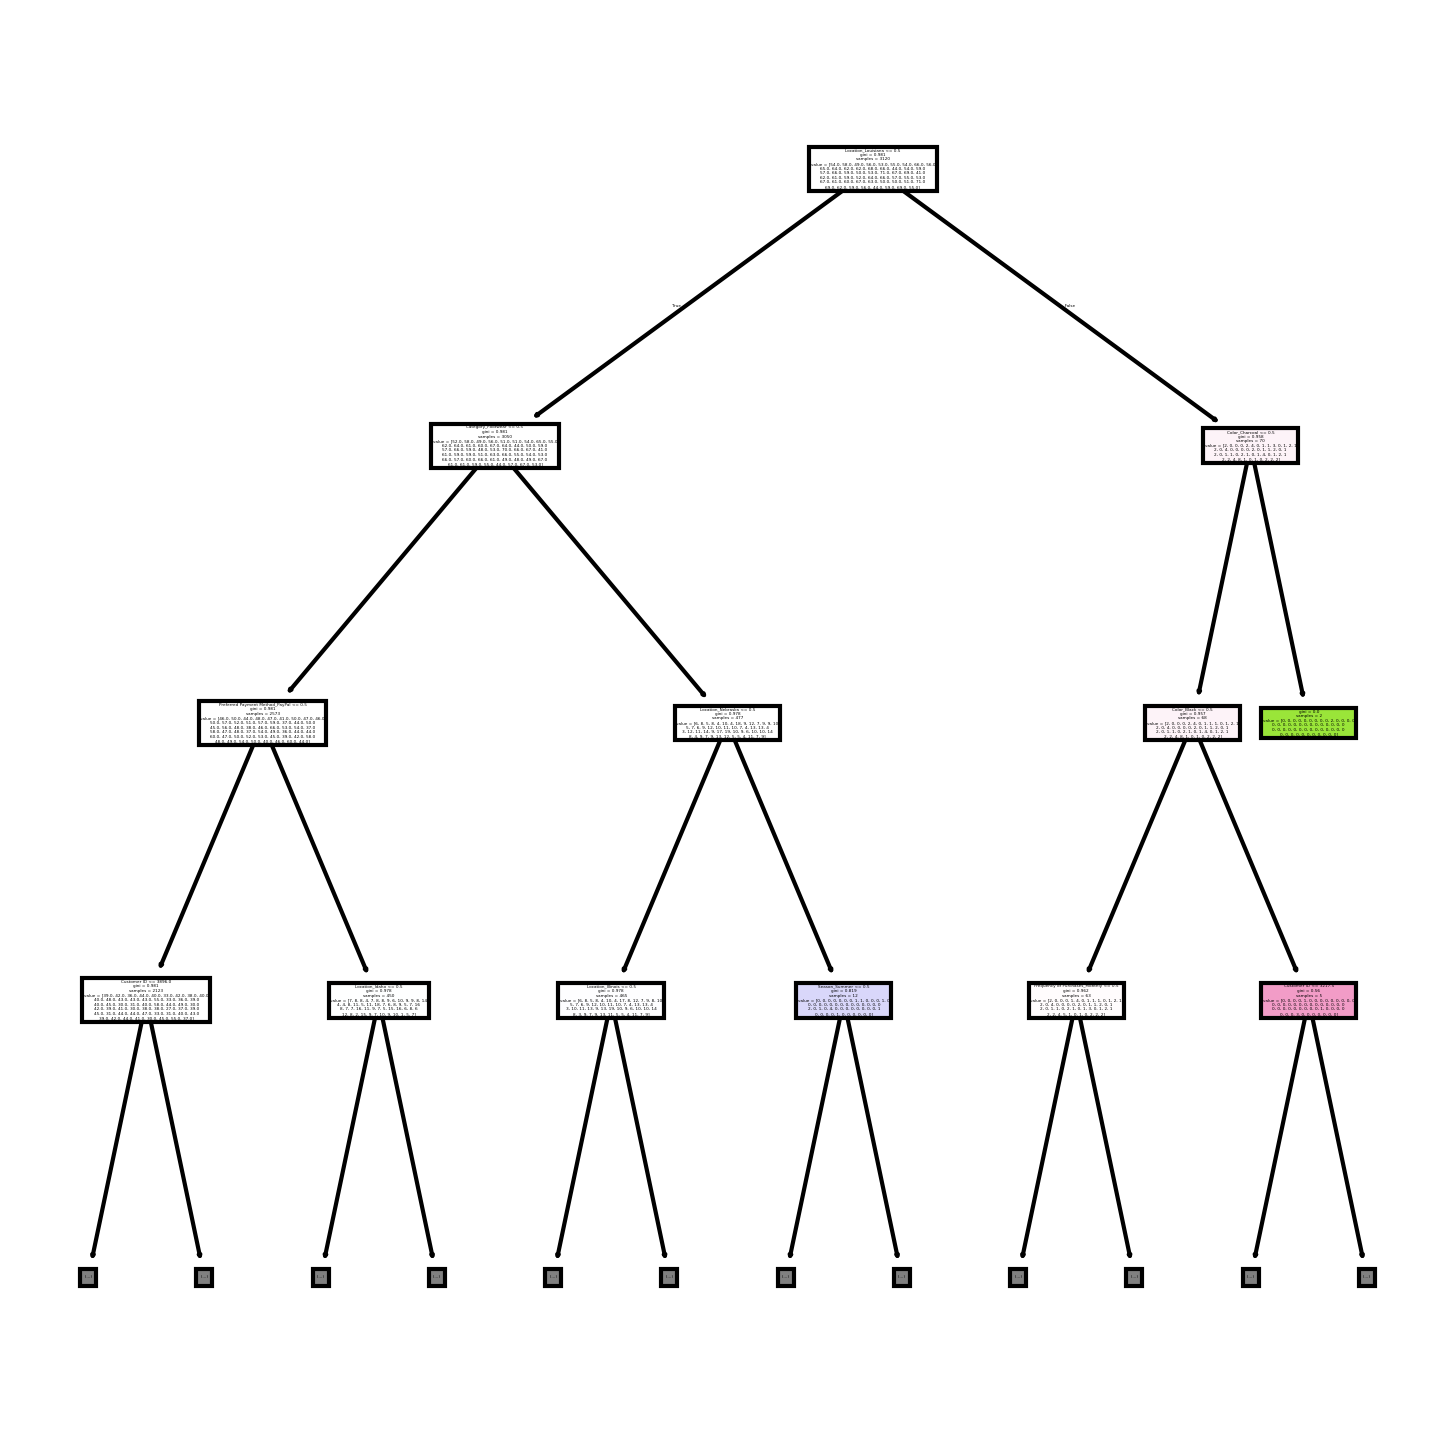

In [31]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(age_clf, max_depth = 3, feature_names = X.columns, filled=True)
plt.show()

### Let's also take a look at the feature importance plot!
Even though this model doesn't do what we want it to, we should still take a look at what features it's looking at to determine its predictions.

In [33]:
import seaborn as sns

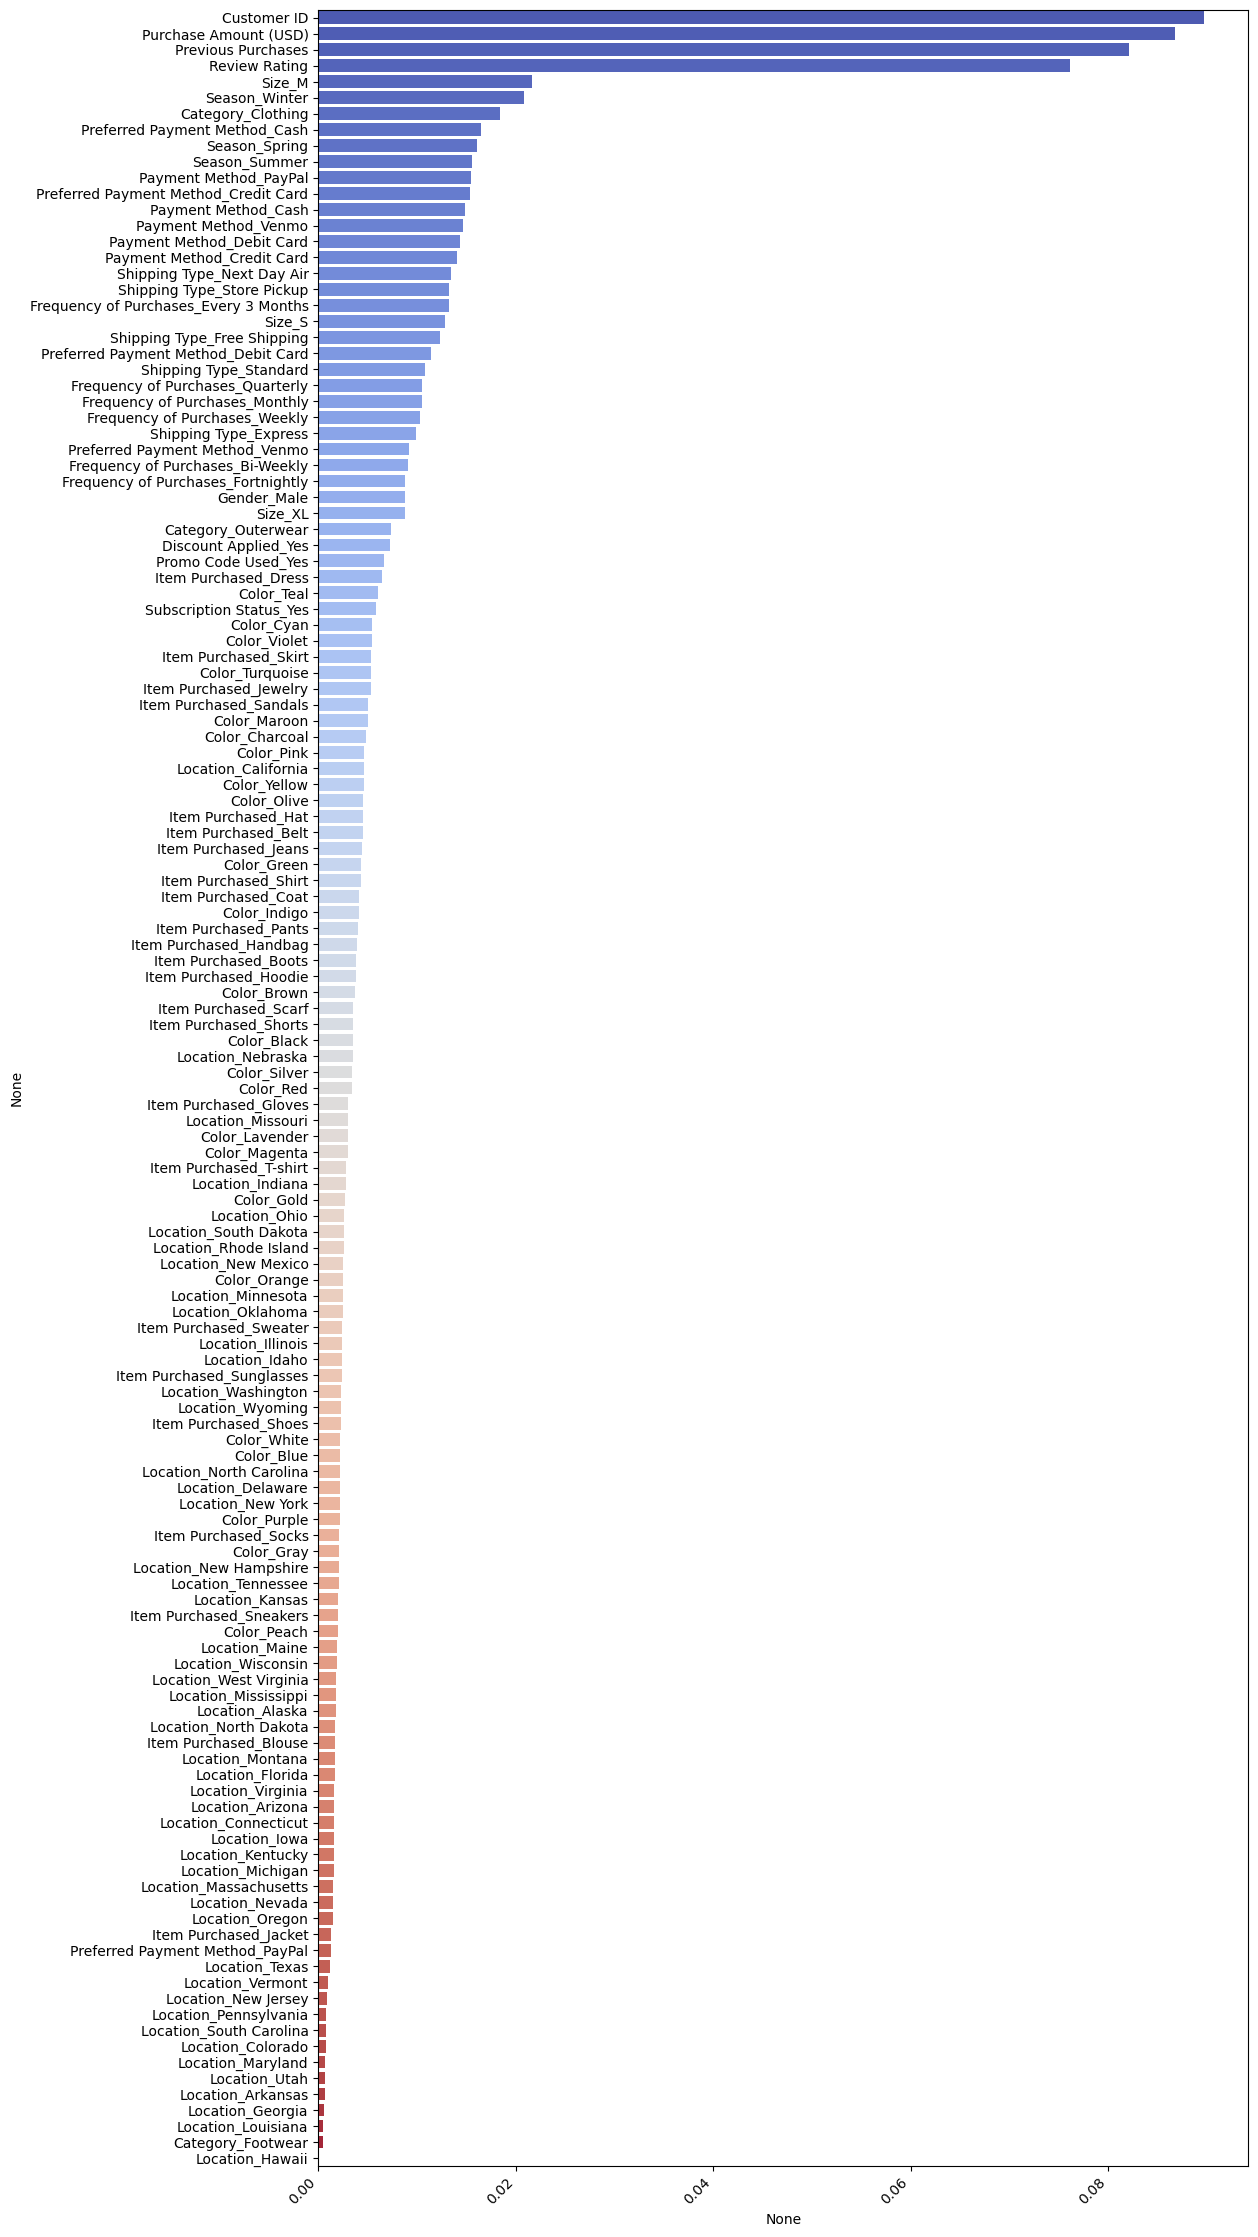

In [34]:
feat_important = age_clf.feature_importances_ 
feat_important = pd.Series(data = feat_important, index = X.columns)
feat_important.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 28))
chart = sns.barplot(x=feat_important, y=feat_important.index, hue=feat_important.index, palette=sns.color_palette("coolwarm", n_colors=len(feat_important)), legend=False)
plt.xticks(rotation=45, horizontalalignment = 'right')
plt.show()

### Accurately predicting age based on personal characteristics and shopping habits is hard!
To be frank, we did definitely cannot use our model and exact dataset to answer the question:
- Can we predict what age a customer is based on their personal characteristics and shopping habits?

It's likely that with the features of our dataset, it would be very hard to accurately predict someone's age purely based on personal characteristics and shopping habits. Granted, it did appear to have an accuracy rate of about 1.92%, so if you still wanted to take your chances...you could...but at great risk 😬. I guess people really are right when they say you just can't tell how old some people are these days 😔.

Jokes aside, this tells us that from a business standpoint, someone would likely need to narrow down the scope of the dataset for more accuracy. Characteristics like the location, payment method, discount applied, and shipping type are hard-pressed to be age predictors in our usage of them. This highlights the importance of testing models and problem-solving over and over again. If this were a dataset for a more serious field (like healthcare), then it would be essential to exert time, money, and resources to having the best accuracy results.

Let's us this knowledge to find out more about customers from this dataset!

### Now we try to model the second question...
- Are we able to predict male gender based on their shopping habits?

We want to try and use only information relating to shopping habits and predict gender. Our goal with this portion is to see how well narrowing the scope of our data can give us insights.

#### We will use another decision tree to try and answer this question. We will see what differences occur and why.
We want to see how well this subset of the whole dataset can predict the gender of a customer. 

### We will read in our dataset again and clean it up to only reflect shopping habit values.
We want to see if non-personal variables can be used to predict personal information.

In [38]:
df_2 = pd.read_csv('shopping_trends.csv')
df_2.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### We'll drop the columns that don't have to do with shopping habits!
In this case, we'll just drop the following columns:
- Customer ID
- Age
- Location

We want to try and narrow down the amount of columns to try and find the 'sweet-spot' of data to accurately answer this question.

In [40]:
df_2 = df_2.drop(columns = ['Customer ID','Age','Location'])
df_2.head()

,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,Male,Sweater,Clothing,64,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,Male,Sandals,Footwear,90,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,Male,Blouse,Clothing,49,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### Now we want to accomplish the same OneHot encoding steps!
This will give our categorical data a boolean value. The model will then be able to use these values to make predictions!

In [42]:
df_2 = pd.get_dummies(df_2, columns = ['Gender', 'Item Purchased', 'Category','Size','Color','Season','Subscription Status','Payment Method','Shipping Type','Discount Applied','Promo Code Used', 'Preferred Payment Method','Frequency of Purchases'], drop_first=True)
df_2.head()

,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,Item Purchased_Gloves,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,53,3.1,14,True,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,64,3.1,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,73,3.1,23,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,90,3.5,49,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,49,2.7,31,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### Now we will want to separate the independent and dependent variables...
Our independent variable will be the __Gender_Male__ column. This column holds boolean values for whether or not a customer is of the male gender.

In [44]:
X = df_2.drop(columns = ['Gender_Male'])
y = df_2['Gender_Male']

### Let's split our sets into training and testing sets!
We already imported scikit-learn's _train_test_split_ function earlier, so we won't import it here again. Next, we will split our data and take a look at the split!

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X, y, test_size = 0.2 )

In [48]:
print("X_train", X2_train.shape)
print("X_test", X2_test.shape)
print("y_train", y2_train.shape)
print("y_test", y2_test.shape)

X_train (3120, 84)
X_test (780, 84)
y_train (3120,)
y_test (780,)


### We'll now train the model!
We also imported the package earlier, so we will just move on to implementing the function!

In [50]:
from sklearn import tree

In [51]:
gender_clf = tree.DecisionTreeClassifier()
gender_clf = gender_clf.fit(X2_train, y2_train)

In [52]:
gen_predict = gender_clf.predict(X2_test)
gen_predict

array([ True, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,

In [53]:
gender_clf.score(X2_test, y2_test)

0.7564102564102564

### Nice! It looks like this narrow of the scope of data was useful in getting a more accurate model!
It's still not _super_ accurate, but it's definitely better than before! Now we know that to predict customer profiles, we most definitely need to narrow down the data! Not all columns prove to be relevant to predicting personal information.

### Let's take a look at this model's features of importance! We will likely see changes in the discrepancies of the variables' importance.

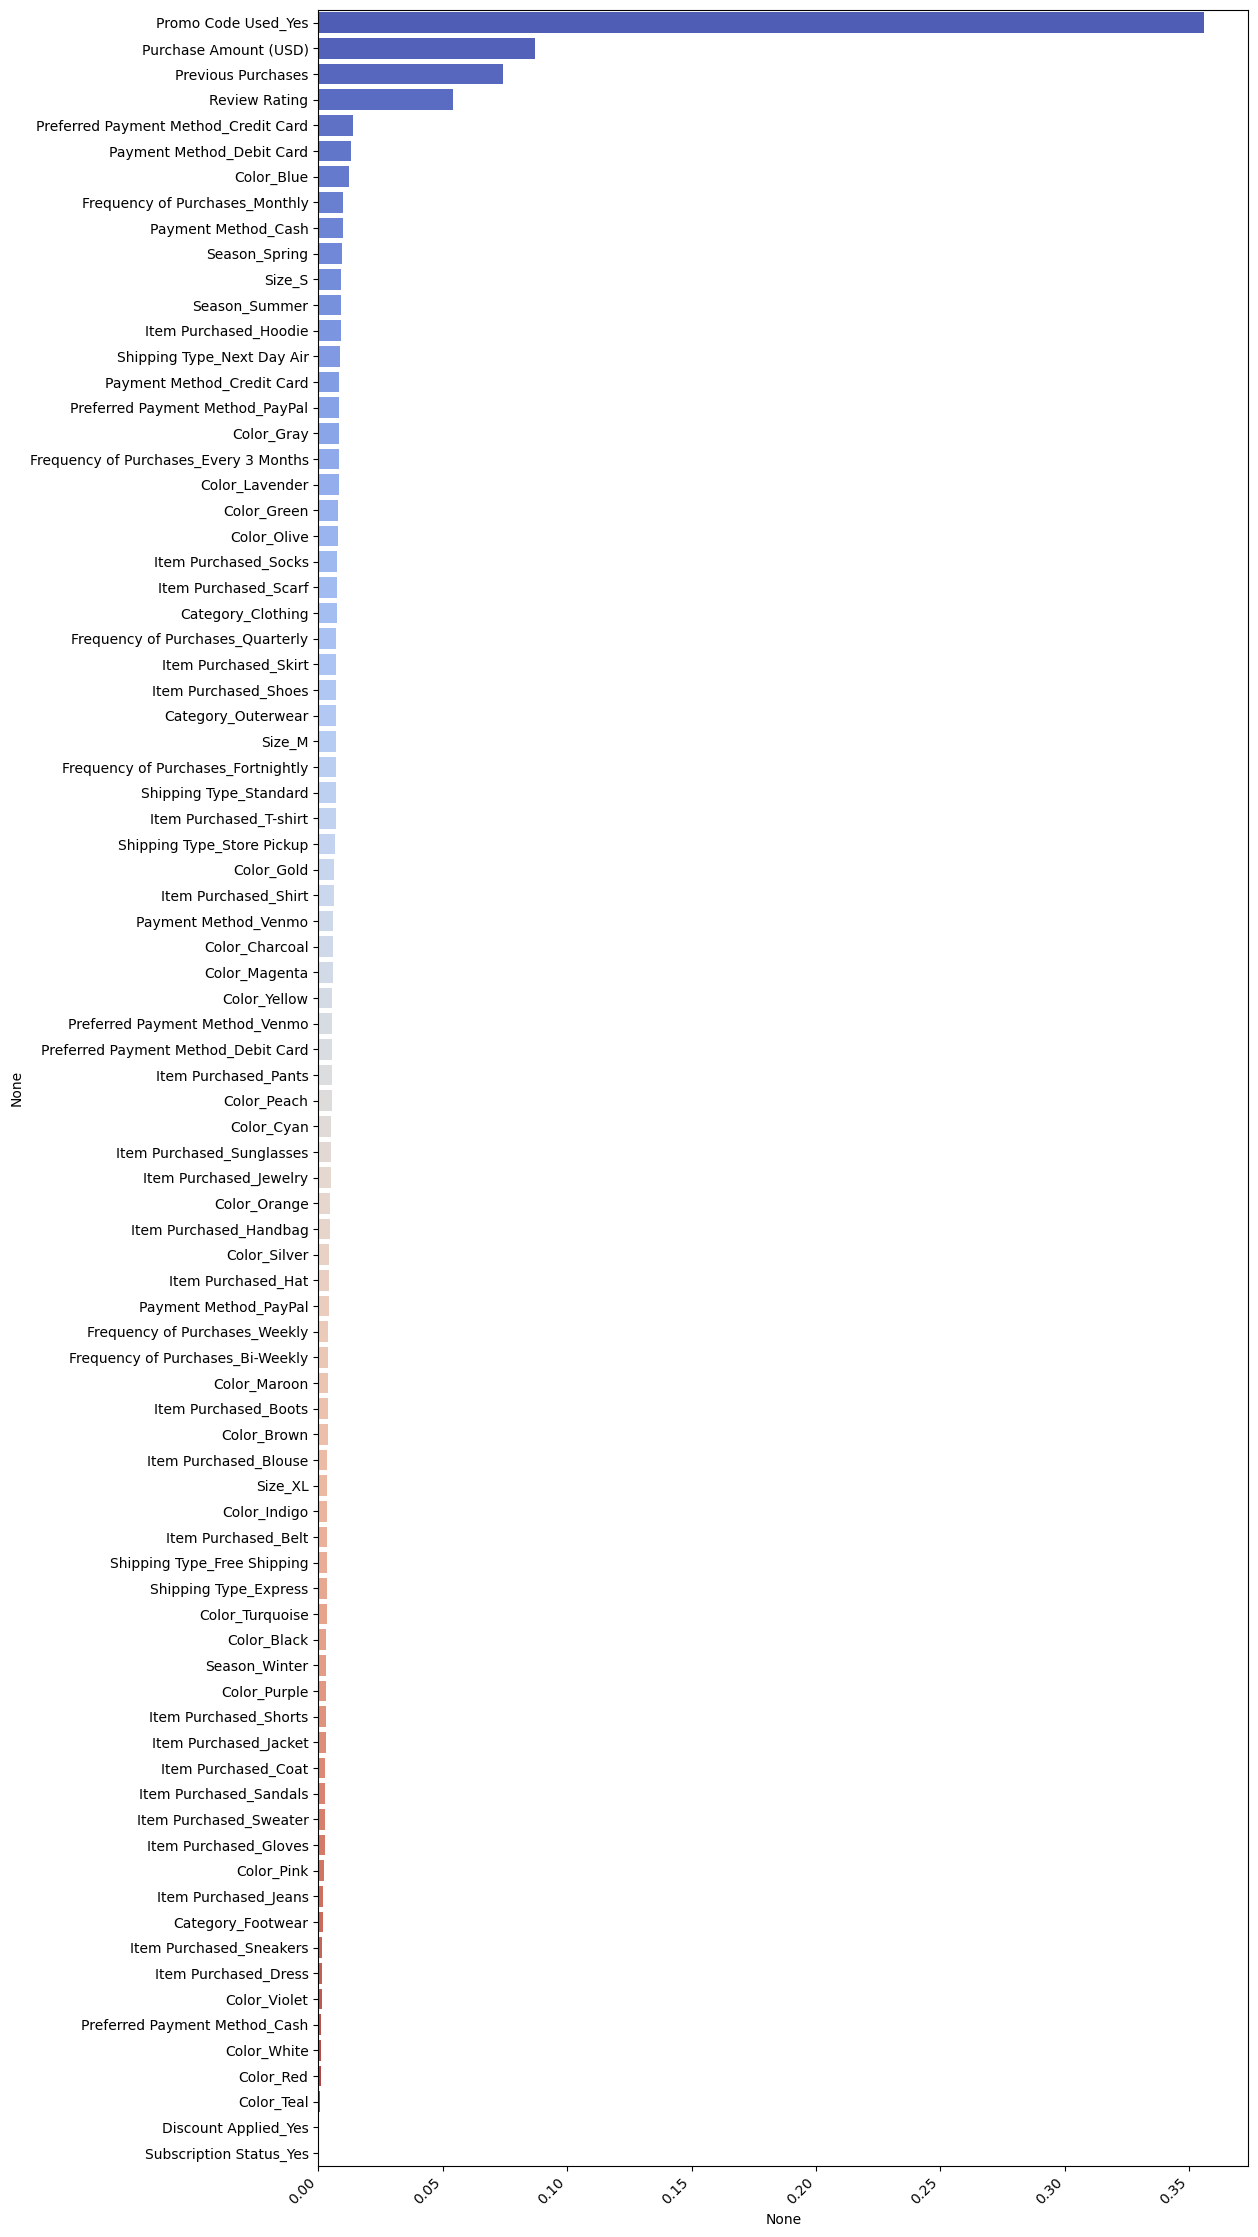

In [56]:
f_i = gender_clf.feature_importances_ 
f_i = pd.Series(data = f_i, index = X.columns)
f_i.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 28))
chart = sns.barplot(x=f_i, y=f_i.index, hue=f_i.index, palette=sns.color_palette("coolwarm", n_colors=len(f_i)), legend=False)
plt.xticks(rotation=45, horizontalalignment = 'right')
plt.show()

### Nice! It looks like there is an individual variable that the model took into account most often!
This differs greatly from our first model! This model is more accurate (though not super accurate) and we can see that through the distribution, there was a variable that the model could make its initial decisions around.

### It's safe to say that although the model is not _super_ accurate at correctly predicting gender, it can skirt by.
The accuracy of the predictions of this model is about 75.6%, which is _much_ better than the previous model. Still, this model could be even more accurate! Theoretically, one could use this model and be somewhat okay with predicting a customer's gender based on shopping habits. 

The question...
- Are we able to predict male gender based on their shopping habits?

...can somewhat be answered by this base model. Yes, it is possible to identify a customer's gender based on the selected data—but only somewhat decently. It is likely that using a different modeling technique would be more beneficial to determining this question and the previous question.

### Needless to say...
Modeling this dataset requires a narrowing down of the scope of the data. What details about a customer's characteristics or habits differentiate them? 